In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math


def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_y)
    ax.set_xlabel(name_x)
    return ax

def max_sigma(y, ya):
    if (len(y) != len(ya)):
        print("ERROR! func max_sigma, len(y) != len(ya)\n")
        return
    max_sigma = 0.0
    i = 0
    for elem in y:
        if (abs(elem - ya[i]) > max_sigma):
            max_sigma = abs(elem - ya[i])
    return max_sigma

def max_delta_x(x):
    return max(x) - min(x)

def drow_line(ax_cur, x, y, x_err=0, y_err=0, line_color="red"):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    df_local = pd.DataFrame()
    df_local['x'] = x
    df_local['ya'] = ya
    df_local.sort_values(by=['x'])
    ax_cur.plot(df_local['x'], df_local['ya'], linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    delta_k = 12 ** 0.5 * max_sigma(y, ya) / max_delta_x(x) / len(x) ** 2
    print("k =", k, '(' + line_color + ')')
    print("delta k =", delta_k)

k = 0.0014821712706916375 (blue)
delta k = 2.340392077930794e-05
3.835462340226621e-05  error rate a
2.3788593232792195e-05  error rate b
0.025877322112978524  error rate a / a
0.0177747764915756  error rate b / b
0.0014821712708452863 a
0.0013383343100863666 b
747.1974621464103
354.5463645810926
597.7563664230919
error rate E 41.6328840779233


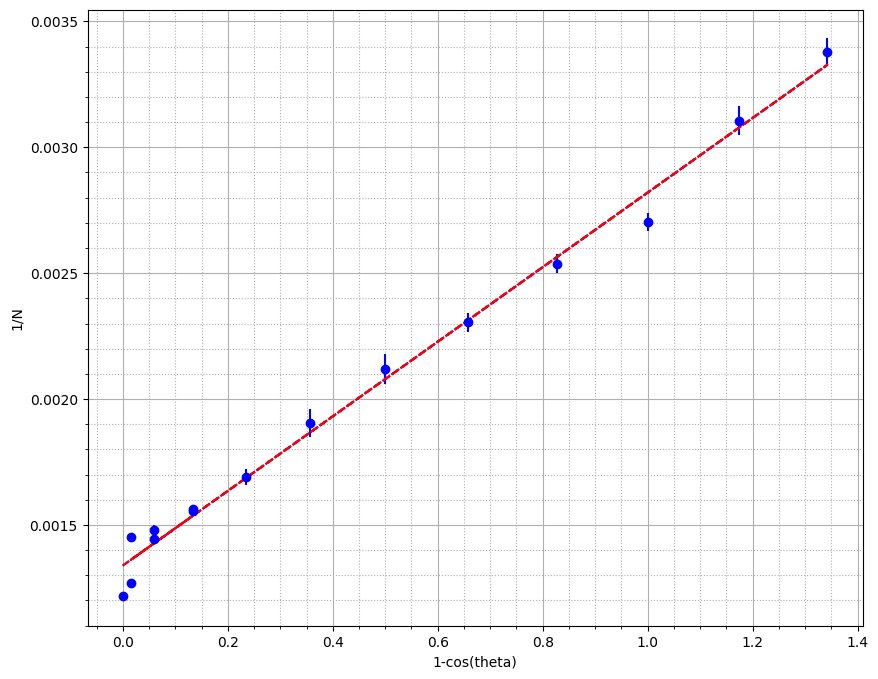

In [19]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 

def mapping(x, a, b): 
    return a * x + b

angle = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, -10, -20, -30]
x = list(map(lambda k: 1 - math.cos(math.radians(k)), angle))
data_pract = pd.DataFrame()
data_pract['theta'] = angle


N = [821, 688, 676, 640, 592, 525, 472, 434, 394, 370, 322, 296, 788, 692, 643]
y = list(map(lambda x: 1/x, N))
data_pract['N'] = N

data = pd.DataFrame()
data['1-cos(theta)'] = x
data['1/N'] = y

delta_y = [5, 6, 9, 5, 11, 15, 13, 7, 6, 5, 6, 5, 7, 6, 8]
data['delta_y'] = [x/(y**2) for x,y in zip(delta_y, N)]

data_pract['delta_N'] = delta_y

ax1 = prepare_plot("1-cos(theta)", "1/N")
drow_line(ax1, x, y, 0, data['delta_y'], "blue")
data
# data_pract




x_aproc = np.array(x)
y_aproc = np.array(y)

args, covarian = curve_fit(mapping, x_aproc, y_aproc)
a, b = args[0], args[1]
y_fit = a * x_aproc + b


sum = 0
length = len(x_aproc)
for i in range(len(x_aproc)):
    sum += (y_fit[i] - y_aproc[i]) ** 2
error_rate = math.sqrt(sum / (length + 1))

x_sr = 0
y_sr = 0

x_dr = 0
y_dr = 0

for i in range(length):
    x_sr += x_aproc[i]
x_sr /= length

for i in range(length):
    x_dr += (x_aproc[i] - x_sr) ** 2
x_dr /= length

for i in range(length):
    y_sr += y_aproc[i]
y_sr /= length

for i in range(length):
    y_dr += (y_aproc[i] - y_sr) ** 2
y_dr /= length

error_rate_a = math.sqrt(((y_dr / x_dr) - a ** 2) / (length - 2))

print(error_rate_a, " error rate a")

x_sr_2 = 0
for i in range(length):
    x_sr_2 += x_aproc[i] ** 2
x_sr_2 /= length

error_rate_b = error_rate_a * math.sqrt(x_sr_2)
print(error_rate_b, " error rate b") 

print(error_rate_a / a, " error rate a / a")
print(error_rate_b / b, " error rate b / b")

plt.plot(x_aproc, y_fit, "r--")
print(a, "a")
print(b, "b")



N_0 = 1/b
print(N_0)
error_rate_N0 = (error_rate_b / b) * N_0
N_90 = 1/(b + a)
error_N90 = math.sqrt((error_rate_a / a) ** 2 + (error_rate_b / b) ** 2) * N_90
print(N_90)
E = 662*N_90/(N_0-N_90)
error_rate_E = math.sqrt(((error_N90 + error_rate_N0) / (N_0 - N_90)) ** 2 + (error_N90 / N_90) ** 2) * E
print(E)
print("error rate E", error_rate_E)

